# atomman.lammps.log_extract(log_info)

- - -

**Lucas M. Hale**, [lucas.hale@nist.gov](mailto:lucas.hale@nist.gov?Subject=ipr-demo), *Materials Science and Engineering Division, NIST*.

**Chandler A. Becker**, [chandler.becker@nist.gov](mailto:chandler.becker@nist.gov?Subject=ipr-demo), *Office of Data and Informatics, NIST*.

**Zachary T. Trautt**, [zachary.trautt@nist.gov](mailto:zachary.trautt@nist.gov?Subject=ipr-demo), *Materials Measurement Science Division, NIST*.

Version: 2017-04-19

[Disclaimers](http://www.nist.gov/public_affairs/disclaimer.cfm) 
 
- - -

## Introduction

__This function is being depreciated! Use [Log](atomman.lammps.Log.ipynb) class instead.__

The log_extract function parses LAMMPS log files and standard outputs to extract thermo data into an easily searchable [DataModelDict](https://github.com/usnistgov/DataModelDict). This function is automatically called by the [run](atomman.lammps.run.ipynb) function.

Arguments:

- __log_extract__ -- standard output from LAMMPS, or a file-like object or string representation of a LAMMPS log file.

__Note__: the current version requires that Step be the first thermo term.

The underlying code can be found in [atomman/lammps/log_extract.py](../../atomman/lammps/log_extract.py).

## Demonstration

In [1]:
#Standard libraries
from __future__ import print_function

#http://matplotlib.org/
import matplotlib.pyplot as plt
%matplotlib inline

#https://github.com/usnistgov/atomman 
import atomman.lammps as lmp

Create a demonstration LAMMPS log file with mutliple runs

In [2]:
log = """LAMMPS (10 Mar 2016-ICMS)
WARNING: OMP_NUM_THREADS environment is not set. (../comm.cpp:90)
  using 1 OpenMP thread(s) per MPI task
#Atomic system info generated by AtomMan package

units metal
atom_style atomic
boundary p p p

lattice fcc 3.52 origin 0.100000 0.100000 0.100000
Lattice spacing in x,y,z = 3.52 3.52 3.52

region box block 0 3 0 3 0 3
create_box 1 box
Created orthogonal box = (0 0 0) to (10.56 10.56 10.56)
  1 by 1 by 1 MPI processor grid
create_atoms 1 box
Created 108 atoms

mass 1 58.71

pair_style eam/fs
pair_coeff * * Ni1_Mendelev_2012.eam.fs Ni

velocity all create 200 4317966

thermo 5000
thermo_style custom step temp press lx ly lz

timestep 0.01

fix 1 all npt temp 100 100 1.0 aniso 0.0 0.0 10.0
run 200000
Neighbor list info ...
  1 neighbor list requests
  update every 1 steps, delay 10 steps, check yes
  max neighbors/atom: 2000, page size: 100000
  master list distance cutoff = 8
  ghost atom cutoff = 8
  binsize = 4 -> bins = 3 3 3
Memory usage per processor = 2.79729 Mbytes
Step Temp Press Lx Ly Lz 
       0          200   -375.27857        10.56        10.56        10.56 
    5000    102.32525   -2874.1245    10.562356    10.577967    10.567493 
   10000    99.949237   -464.72062    10.560452    10.568403    10.563193 
   15000    113.13927    2951.0775    10.565528    10.560406    10.549039 
   20000    104.08008   -7175.8592    10.590639    10.591524    10.550833 
   25000    88.991529    652.89481    10.561735    10.566272    10.558136 
   30000    93.166498    433.99513     10.56767    10.567077    10.554423 
   35000    94.760338   -1981.9677    10.567668     10.56357    10.572553 
   40000    105.72491    2228.9383    10.559016    10.552426    10.567564 
   45000    98.705296   -16.860425     10.56274    10.561545    10.567819 
   50000    114.63923   -1483.6518    10.565051    10.572864    10.563048 
   55000    100.76251    2695.4673    10.560486    10.574747    10.541099 
   60000    101.67316    885.30793    10.564906    10.573367    10.545685 
   65000    93.338885   -1281.7225     10.56839    10.571265    10.558593 
   70000    91.520281    175.61167    10.567837    10.574561    10.545926 
   75000    92.342551    2449.5905    10.561357    10.561826    10.552664 
   80000    110.74532     -3719.06    10.575473      10.5717    10.568099 
   85000    95.306449     304.4212    10.567125     10.56319    10.560793 
   90000    96.600285    1585.5542     10.56062     10.55945    10.560923 
   95000    100.24671    -4502.114    10.563101    10.576328    10.577447 
  100000    107.51092     4563.463    10.551229    10.554082    10.558627 
  105000    99.978465   -3026.7742    10.569791    10.568474    10.571648 
  110000    84.469495    3192.9596    10.561426    10.552335    10.558679 
  115000    93.264133   -3386.3238    10.574478     10.56495    10.569435 
  120000    92.526481    1859.7221    10.562454    10.558431    10.557583 
  125000     95.86825   -2450.6499    10.567242    10.569712    10.568358 
  130000    94.002748    1848.3598    10.558551    10.562481    10.559174 
  135000     113.3463   -2962.1498    10.565059    10.573484    10.570066 
  140000    97.808023    3523.5429    10.554111    10.560707    10.558678 
  145000    107.19815   -6789.5351    10.578196    10.575247    10.580731 
  150000    104.63821    2905.3024    10.560712    10.550988    10.560513 
  155000    106.17603    2401.9117    10.562261    10.557761    10.561794 
  160000    112.98114   -3789.9431    10.574213     10.56496      10.5752 
  165000    94.768215    4228.2346    10.558569    10.552568    10.557242 
  170000    98.205966   -3421.4345    10.569998    10.573646    10.567188 
  175000    97.559234    2670.3187    10.554766    10.566517    10.554097 
  180000    109.11097   -2117.0945    10.565048     10.57296    10.569182 
  185000    114.05733    1902.6593    10.555565    10.560582    10.566896 
  190000    117.71856    -7193.401    10.576387    10.567115    10.590128 
  195000    96.847499     1693.037    10.559349    10.559157    10.562669 
  200000     95.97293   -7150.5308    10.586504    10.566587     10.58522 
Loop time of 63.0292 on 1 procs for 200000 steps with 108 atoms

Performance: 2741.586 ns/day, 0.009 hours/ns, 3173.131 timesteps/s
97.8% CPU use with 1 MPI tasks x 1 OpenMP threads

MPI task timing breakdown:
Section |  min time  |  avg time  |  max time  |%varavg| %total
---------------------------------------------------------------
Pair    | 57.936     | 57.936     | 57.936     |   0.0 | 91.92
Neigh   | 0          | 0          | 0          |   0.0 |  0.00
Comm    | 1.4076     | 1.4076     | 1.4076     |   0.0 |  2.23
Output  | 0          | 0          | 0          |   0.0 |  0.00
Modify  | 3.2932     | 3.2932     | 3.2932     |   0.0 |  5.22
Other   |            | 0.3929     |            |       |  0.62

Nlocal:    108 ave 108 max 108 min
Histogram: 1 0 0 0 0 0 0 0 0 0
Nghost:    1580 ave 1580 max 1580 min
Histogram: 1 0 0 0 0 0 0 0 0 0
Neighs:    10800 ave 10800 max 10800 min
Histogram: 1 0 0 0 0 0 0 0 0 0

Total # of neighbors = 10800
Ave neighs/atom = 100
Neighbor list builds = 0
Dangerous builds = 0

fix 1 all npt temp 100 200 1.0 aniso 0.0 0.0 10.0
run 5000
Memory usage per processor = 2.79729 Mbytes
Step Temp Press Lx Ly Lz 
  200000     95.97293   -7150.5308    10.586504    10.566587     10.58522 
  205000    174.35332    303.12754    10.573453    10.581496    10.561533 
Loop time of 1.60696 on 1 procs for 5000 steps with 108 atoms

Performance: 2688.314 ns/day, 0.009 hours/ns, 3111.475 timesteps/s
98.0% CPU use with 1 MPI tasks x 1 OpenMP threads

MPI task timing breakdown:
Section |  min time  |  avg time  |  max time  |%varavg| %total
---------------------------------------------------------------
Pair    | 1.4821     | 1.4821     | 1.4821     |   0.0 | 92.23
Neigh   | 0          | 0          | 0          |   0.0 |  0.00
Comm    | 0.031204   | 0.031204   | 0.031204   |   0.0 |  1.94
Output  | 0          | 0          | 0          |   0.0 |  0.00
Modify  | 0.09361    | 0.09361    | 0.09361    |   0.0 |  5.83
Other   |            | 0          |            |       |  0.00

Nlocal:    108 ave 108 max 108 min
Histogram: 1 0 0 0 0 0 0 0 0 0
Nghost:    1580 ave 1580 max 1580 min
Histogram: 1 0 0 0 0 0 0 0 0 0
Neighs:    10777 ave 10777 max 10777 min
Histogram: 1 0 0 0 0 0 0 0 0 0

Total # of neighbors = 10777
Ave neighs/atom = 99.787
Neighbor list builds = 0
Dangerous builds = 0

fix 1 all npt temp 200 200 1.0 aniso 0.0 0.0 10.0
run 200000
Memory usage per processor = 2.79729 Mbytes
Step Temp Press Lx Ly Lz 
  205000    174.35332    303.12754    10.573453    10.581496    10.561533 
  210000    215.68713     215.5359    10.570297    10.626492    10.522866 
  215000    212.34039    -325.1849    10.571859    10.585667     10.56653 
  220000    183.48639   -12.449246     10.58127    10.563781     10.57619 
  225000    219.25434   -1597.6758    10.585556     10.54788    10.596484 
  230000    214.85202    1868.0509    10.591791    10.524381    10.593777 
  235000    211.45266    3175.3525    10.568545    10.520135    10.616032 
  240000    200.18858    1613.8938    10.568477    10.571398    10.574004 
  245000    177.71714    968.73454    10.550119    10.601593    10.559038 
  250000    176.41432    1105.2903    10.545861     10.61831    10.547823 
  255000    190.65222    2345.5065    10.553956    10.601153    10.540749 
  260000     206.5508    5622.9303    10.583539    10.531481    10.571085 
  265000     209.4042    -377.7764    10.612111    10.488995    10.632313 
  270000     172.9138    1059.5334    10.587247    10.527683    10.595939 
  275000    213.20394    1737.5166    10.576694    10.567444     10.56235 
  280000     218.7902    2618.7805    10.572126    10.595789    10.538311 
  285000    199.75732    2224.4646    10.567246    10.591857    10.547429 
  290000    179.05033    9237.4767    10.527159    10.552224     10.58186 
  295000    180.44432    8928.3744    10.516531    10.506687    10.646798 
  300000    179.36332    6203.0177    10.530443    10.510781    10.640846 
  305000    189.63473    7648.9391    10.548118    10.537881    10.588476 
  310000    217.23817    1576.6567    10.573278    10.569977    10.567736 
  315000    220.28573     4452.366    10.568058    10.581943     10.54711 
  320000    210.35116    1483.2622    10.570533    10.573437    10.564883 
  325000    229.74858    2966.9465    10.564637    10.570331    10.566308 
  330000    173.03543    129.14872     10.57139    10.568475    10.567682 
  335000    193.83577    4374.3785    10.598546     10.58675    10.504408 
  340000    159.58428   -3179.5898    10.579846    10.568675    10.582824 
  345000    213.40327   -1793.2578    10.569829    10.567022    10.590283 
  350000    189.32373   -2944.3867    10.568226    10.568103    10.597876 
  355000    217.50164    605.85818    10.573896    10.579992    10.564232 
  360000    172.45288    2281.7137    10.584369    10.593158    10.527849 
  365000    203.11785    408.49983    10.584828     10.56675    10.559308 
  370000    187.07982    444.74805    10.575752    10.572765    10.568807 
  375000    215.54699   -361.97751    10.563416    10.540367    10.621305 
  380000    182.97886   -763.74129    10.566631    10.556974    10.593661 
  385000    213.56806   -478.52733    10.572116    10.573497    10.576098 
  390000    203.28318   -1190.7923    10.571609    10.598114    10.556619 
  395000    200.07337    -1816.545    10.573814    10.596454    10.566683 
  400000    211.85753    -5171.423    10.579539    10.598641     10.57587 
  405000    214.69752    -5101.709    10.561531    10.571405    10.613793 
Loop time of 64.771 on 1 procs for 200000 steps with 108 atoms

Performance: 2667.860 ns/day, 0.009 hours/ns, 3087.800 timesteps/s
97.9% CPU use with 1 MPI tasks x 1 OpenMP threads

MPI task timing breakdown:
Section |  min time  |  avg time  |  max time  |%varavg| %total
---------------------------------------------------------------
Pair    | 59.994     | 59.994     | 59.994     |   0.0 | 92.62
Neigh   | 0          | 0          | 0          |   0.0 |  0.00
Comm    | 1.0609     | 1.0609     | 1.0609     |   0.0 |  1.64
Output  | 0          | 0          | 0          |   0.0 |  0.00
Modify  | 3.4031     | 3.4031     | 3.4031     |   0.0 |  5.25
Other   |            | 0.313      |            |       |  0.48

Nlocal:    108 ave 108 max 108 min
Histogram: 1 0 0 0 0 0 0 0 0 0
Nghost:    1580 ave 1580 max 1580 min
Histogram: 1 0 0 0 0 0 0 0 0 0
Neighs:    10719 ave 10719 max 10719 min
Histogram: 1 0 0 0 0 0 0 0 0 0

Total # of neighbors = 10719
Ave neighs/atom = 99.25
Neighbor list builds = 0
Dangerous builds = 0
Total wall time: 0:02:09
"""

Call log_extract

In [3]:
results = lmp.log_extract(log)

c:\users\lmh1\documents\python-packages\atomman\atomman\lammps\log_extract.py:16: DeprecationWarning: log_extract function is replaced with the Log class
  warnings.warn('log_extract function is replaced with the Log class', DeprecationWarning)


Results is a DataModelDict which organizes the thermo data and makes it easily searchable. The structure of the data model is

- 'LAMMPS-log-thermo-data' -- root element
    - 'simulation' -- list of run/minimizations
        - 'thermo' -- key indicating thermo data
            - term -- name of term is the label for the thermo data column: 'Step', 'Lx', etc. Contains a list of the associated values
                

Get all simulations

In [4]:
sims = results.finds('simulation')
print(len(sims))

3


List all thermo keys in the first simulation

In [5]:
print(sims[0]['thermo'].keys())

['Step', 'Temp', 'Press', 'Lx', 'Ly', 'Lz']


Plot Lx,Ly,Lz vs Step for the third simulation

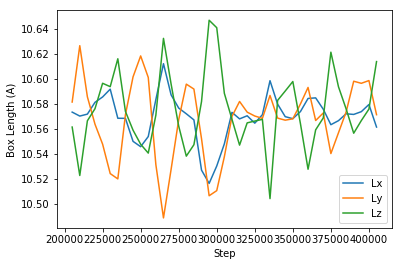

In [6]:
steps = sims[2].finds('Step')
lx = sims[2].finds('Lx')
ly = sims[2].finds('Ly')
lz = sims[2].finds('Lz')

plt.plot(steps, lx, label='Lx')
plt.plot(steps, ly, label='Ly')
plt.plot(steps, lz, label='Lz')

plt.legend()
plt.xlabel('Step')
plt.ylabel('Box Length (A)')
plt.show()

Plot Temp vs Step for all simulations

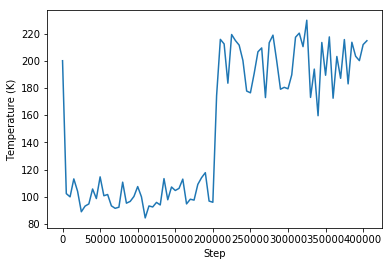

In [7]:
steps = results.finds('Step')
temps = results.finds('Temp')

plt.plot(steps, temps)

plt.xlabel('Step')
plt.ylabel('Temperature (K)')
plt.show()

- - -
__Docs Navigation:__

Tutorial:

1. [Basics](../tutorial/1 Basics.ipynb)

2. [LAMMPS Functionality](../tutorial/2 LAMMPS Functionality.ipynb)

3. [Defect Generation and Evaluation](../tutorial/3 Defect Generation and Evaluation.ipynb)


Reference:

- [atomman](../reference/atomman.ipynb)

- [atomman.convert](../reference/atomman.convert.ipynb)

- [atomman.defect](../reference/atomman.defect.ipynb)

- [atomman.lammps](../reference/atomman.lammps.ipynb)

- [atomman.tools](../reference/atomman.tools.ipynb)

- [atomman.unitconvert](../reference/atomman.unitconvert.ipynb)